In [1]:
import pandas
import numpy
import sklearn
from sklearn import *

import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/EN/S08_09_Retail_Analytics/salesCereals.csv'

salesCereals = pandas.read_csv(url)
salesCereals['PRICE_p2'] = salesCereals['PRICE']**2
salesCereals.head()

,Unnamed: 0,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,...,DISPLAY,TPR_ONLY,Desc,Category,Sub-Category,SUMPRICE,COUNTPRICE,AVGPRICE,RELPRICE,PRICE_p2
0,6,2009-01-14,367.0,1111085319,14.0,13.0,13.0,26.32,1.88,1.88,...,0.0,0.0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,19.54,7,2.791429,0.673490,3.5344
1,8,2009-01-14,367.0,1111085350,35.0,27.0,25.0,69.30,1.98,1.98,...,0.0,0.0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,19.54,7,2.791429,0.709314,3.9204
2,12,2009-01-14,367.0,1600027527,12.0,10.0,10.0,38.28,3.19,3.19,...,0.0,0.0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,19.54,7,2.791429,1.142784,10.1761
3,13,2009-01-14,367.0,1600027528,31.0,26.0,19.0,142.29,4.59,4.59,...,0.0,0.0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,19.54,7,2.791429,1.644319,21.0681
4,14,2009-01-14,367.0,1600027564,56.0,48.0,42.0,152.32,2.72,3.07,...,0.0,0.0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,19.54,7,2.791429,0.974411,7.3984


In [3]:
print(salesCereals.groupby('UPC').count())

            Unnamed: 0  WEEK_END_DATE  STORE_NUM  UNITS  VISITS  HHS  SPEND  \
UPC                                                                           
1111085319         156            156        156    156     156  156    156   
1111085350         156            156        156    156     156  156    156   
1600027527         156            156        156    156     156  156    156   
1600027528         156            156        156    156     156  156    156   
1600027564         155            155        155    155     155  155    155   
3000006340         133            133        133    133     133  133    133   
3800031829         155            155        155    155     155  155    155   

            PRICE  BASE_PRICE  FEATURE  DISPLAY  TPR_ONLY  Desc  Category  \
UPC                                                                         
1111085319    156         156      156      156       156   156       156   
1111085350    156         156      156      156       156

In [4]:
feature_list = ['PRICE', 'PRICE_p2', 'FEATURE', 'DISPLAY','TPR_ONLY','RELPRICE']

productList = salesCereals['UPC'].unique()
upc = 1600027528

X = salesCereals.loc[salesCereals['UPC']==upc][feature_list]
y = salesCereals.loc[salesCereals['UPC']==upc]['UNITS']
  # Split into training and testing data
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0)


In [5]:
#Linear model

# Fit the model
regr = sklearn.linear_model.LinearRegression().fit(X_train,y_train)

# Measure the RSME on the training set
trainRMSE = numpy.sqrt(sklearn.metrics.mean_squared_error(y_train, regr.predict(X_train)))

# Prediction on the test set
y_pred = regr.predict(X_test)

# Measure the prediction performances on the test set
testMAE = sklearn.metrics.mean_absolute_error(y_test, y_pred)
testMAPE = numpy.mean(numpy.abs((y_test - y_pred) / y_test))
testRMSE = numpy.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))

print('Linear regression Summary - UPC:'+str(upc))
print('Training RMSE:' + str(round(trainRMSE,2)))
print('Testing MAE:' + str(round(testMAE,2)))
print('Testing MAPE:' + str(round(testMAPE,2)))
print('Testing RMSE:' + str(round(testRMSE,2)))


Linear regression Summary - UPC:1600027528
Training RMSE:9.07
Testing MAE:8.09
Testing MAPE:0.25
Testing RMSE:14.07


D:\ProgramData\Anaconda3\envs\sca_book2\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


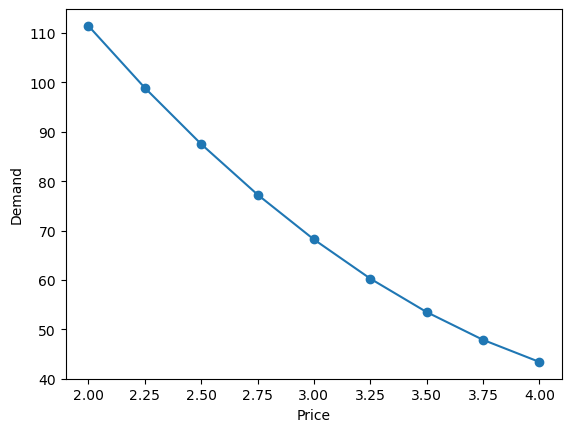

In [6]:
prices = [2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0]
input_x = []

# generate inputs for the plot using simple feature values and varying price points
for p in prices:
  input_x.append([p, p**2, 0,0,0, 1.0])

# obtain the predicted demands
predict_y = regr.predict(input_x)
plt.plot(prices, predict_y, marker='o')
plt.xlabel('Price')
plt.ylabel('Demand')
plt.show()

In [7]:
#Tree models
# regr = sklearn.tree.DecisionTreeRegressor(random_state = 0).fit(X_train,y_train) # standard regression tree
regr = sklearn.ensemble.RandomForestRegressor(random_state = 0).fit(X_train,y_train) # random forest tree

# Measure the RSME on the training set
trainRMSE = numpy.sqrt(sklearn.metrics.mean_squared_error(y_train, regr.predict(X_train)))

# Prediction on the test set
y_pred = regr.predict(X_test)

# Measure the prediction performances on the test set
testMAE = sklearn.metrics.mean_absolute_error(y_test, y_pred)
testMAPE = numpy.mean(numpy.abs((y_test - y_pred) / y_test))
testRMSE = numpy.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))

print('Tree regression Summary - UPC:'+str(upc))
print('Training RMSE:' + str(round(trainRMSE,2)))
print('Testing MAE:' + str(round(testMAE,2)))
print('Testing MAPE:' + str(round(testMAPE,2)))
print('Testing RMSE:' + str(round(testRMSE,2)))

Tree regression Summary - UPC:1600027528
Training RMSE:4.92
Testing MAE:8.7
Testing MAPE:0.28
Testing RMSE:14.53


In [8]:
# plot to see how the results look like when changing prices
prices = [2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0]
input_x = []

# generate inputs for the plot using simple feature values and varying price points
for p in prices:
  input_x.append([p, p**2, 0,0,0, 1.0])

input_x

[[2.0, 4.0, 0, 0, 0, 1.0],
 [2.25, 5.0625, 0, 0, 0, 1.0],
 [2.5, 6.25, 0, 0, 0, 1.0],
 [2.75, 7.5625, 0, 0, 0, 1.0],
 [3.0, 9.0, 0, 0, 0, 1.0],
 [3.25, 10.5625, 0, 0, 0, 1.0],
 [3.5, 12.25, 0, 0, 0, 1.0],
 [3.75, 14.0625, 0, 0, 0, 1.0],
 [4.0, 16.0, 0, 0, 0, 1.0]]

D:\ProgramData\Anaconda3\envs\sca_book2\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


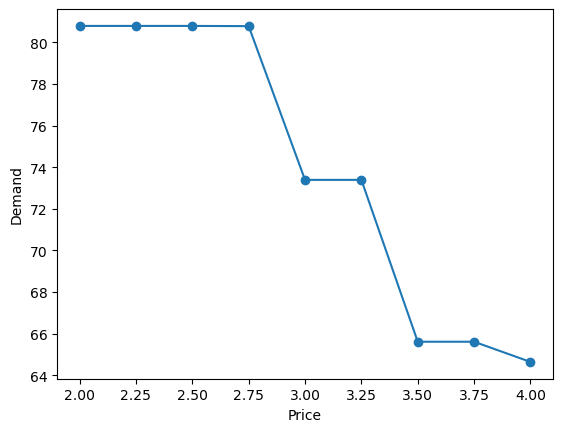

In [9]:
# obtain the predicted demands
predict_y = regr.predict(input_x)
plt.plot(prices, predict_y, marker='o')
plt.xlabel('Price')
plt.ylabel('Demand')
plt.show()

In [10]:
# Selected model

# Fit the model on the entire dataset
regr = sklearn.linear_model.LinearRegression().fit(X,y)

# Prediction on the test set
y_pred = regr.predict(X)

# Measure the prediction performances on the entire dataset
overallMAE = sklearn.metrics.mean_absolute_error(y, y_pred)
overallMAPE = numpy.mean(numpy.abs((y - y_pred) / y))
overallRMSE = numpy.sqrt(sklearn.metrics.mean_squared_error(y, y_pred))

print('Regression Summary - UPC:'+str(upc))
print('Overall MAE:' + str(round(overallMAE,2)))
print('Overall MAPE:' + str(round(overallMAPE,2)))
print('Overall RMSE:' + str(round(overallRMSE,2)))

Regression Summary - UPC:1600027528
Overall MAE:7.06
Overall MAPE:0.3
Overall RMSE:10.43


In [11]:
cwd = './'

In [12]:
# save the models to drive (here we save model only for one UPC).
import pickle

filename = cwd+str(upc)+'_single_upc_demand_model.sav'
# save the model to disk
pickle.dump(regr, open(filename, 'wb'))